
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Data Analytics 

### Gridded Data Structures / ndarrays in Python

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

### Exercise: Gridded Data Structures / ndarrays in Python 

This is a tutorial for / demonstration of **Regular Gridded Data Structures in Python**.  In Python, a common tool for dealing with Regular Gridded Data Structures is the *ndarray* from the **NumPy Python package** (by Jim Hugunin et al.).    

This tutorial includes the methods and operations that would commonly be required for Engineers and Geoscientists working with Regularly Gridded Data Structures for the purpose of:

1. Data Checking and Cleaning
2. Data Mining / Inferential Data Analysis
3. Predictive Modeling

for Data Analytics, Geostatistics and Machine Learning.

##### Regular Gridded Data Structures

In Python we will commonly store our data in two formats, tables and arrays.  For sample data with typically multiple features $1,\ldots,m$ over $1,\ldots,n$ samples we will work with tables.  For exhaustive 2D maps and 3D models (usually representing a single feature) on a regular grid over $[1,\ldots,n_{1}], [1,\ldots,n_{2}],\ldots,[1,\ldots,n_{ndim}]$, where $n_{dim}$ is the number of dimensions, we will work with arrays.  Of course, it is always possible to add another dimension to our array to include multiple features, $1,\ldots,m$, over all locations.

In geostatistical workflows the tables are typically sample data from wells and drill holes and the grids are the  interpolated or simulated models or secondary data from sources such as seismic inversion.

The NumPy package provides a convenient *ndarray* object for working with regularly gridded data. In the following tutorial we will focus on practical methods with *ndarray*s.  There is another section available on Tabular Data Structures that focuses on DataFrames at https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/PythonDataBasics_DataFrame.ipynb.
#### Additional Resources

These workflows are based on standard methods with their associated limitations and assumptions. For more information see:

* [numpy ndarray Lecture](https://www.youtube.com/watch?v=sc7DWkGX8Z4&list=PLG19vXLQHvSDUmEOmBoaxGbFAbvaLdfx4&index=9&t=0s)

I have provided various workflows for subsurface data analytics, geostatistics and machine learning:

* [Python](https://git.io/fh4eX)

* [Excel](https://github.com/GeostatsGuy/LectureExercises/blob/master/Lecture7_CI_Hypoth_eg_R.xlsx) 
* [R](https://github.com/GeostatsGuy/LectureExercises/blob/master/Lecture7_CI_Hypoth_eg.R)  

and all of my University of Texas at Austin 

* [Lectures](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig/featured?view_as=subscriber)

#### Workflow Goals

Learn the basics for working with Tabular Data Structures in Python. This includes:

* Loading tabular data
* Visualizing tabular data
* Data QC and Cleaning
* Interacting with the tabular data

#### Objective 

I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Gridded data - porosity_truth_map.dat at [here](https://github.com/GeostatsGuy/GeoDataSets/blob/master/porosity_truth_map.dat)

I have put together various subsurface workflows for data analytics, geostatistics and machine learning. Go [here](https://git.io/fh4eX) for other example workflows and source code. 

#### Load the required libraries

The following code loads the required libraries.

In [1]:
import os                                                   # set current working directory 
import numpy as np                                          # ndarrays
import matplotlib.pyplot as plt                             # plotting
from scipy import stats                                     # summary stats
import geostatspy.GSLIB as GSLIB                            # pixelplt function

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing `python -m pip install [package-name]`. More assistance is available with the respective package docs.    

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this directory.  When we are done with this tutorial we will write our new dataset back to this directory.  

In [2]:
os.chdir("c:/PGE383")                                       # set the working directory

#### Loading and Writing

Let's load the 2D porosity map from the provide binary file.  This file was created with the NumPy *ndarray* member function 'tofile'.  Note: this and the read from file member function, *fromfile*, are convenience functions.  They do not store any information about the array. So when we read our 100 x 100 array this results in a 10,000 1D array.  Let's try for ourselves. We can read the binary to an array like this:

In [3]:
porosity_map = np.fromfile('porosity_truth_map.dat')

Next, let's look at the shape member:

In [4]:
porosity_map.shape

(10000,)

Confirmed, the shape is (10000,), a 10,000 node 1D array.  Given we know it is actually a 100x100 array, we can use the *ndarray* member function *reshape* to correct this.  Note, you get an error if the sizes are inconsistent, $\prod^{i} n_{i} \neq n_{1D}$ where $n_{i}$ is the number of nodes for axis $i$ and $n_{1D}$ is the number of nodes in the 1D vector that was read in.  We reshape the array to 100x100, print the results and then get the 'ndarray' member 'shape' elements 0 and 1 to confirm the $n_{1} = n_{2} = 100$.

In [5]:
porosity_map = np.reshape(porosity_map,[100,100])                # reshape the array to 100 x 100
print(porosity_map.shape)
ny = porosity_map.shape[0]                                       # get the array nx
nx = porosity_map.shape[1]                                       # get the array ny
print('Our 2D array has number of x cells = ' + str(nx) + ', and y cells = ' + str(ny) + '.' )

(100, 100)
Our 2D array has number of x cells = 100, and y cells = 100.


Let's close the loop and write out the array and read it back in, to demonstrat the *ndarray* writing member function *tofile*.  

In [6]:
porosity_map.tofile("porosity_test.dat")                         # save our 2D array to a 1D binary file
porosity_test = np.fromfile('porosity_test.dat')                 # read the 1D binary back to a 1D array
check = np.array_equal(porosity_map.flatten(),porosity_test)     # check if the read in array is the same as flatten orig.
print('The array we wrote out and read back in are the same, we closed the loop,' + str(check) + '.')

The array we wrote out and read back in are the same, we closed the loop,True.


It worked!  

* We used the NumPy function 'array_equal' to test if the arrays are the same. 

Did you notice I added the *flatten* member function?  

* This caused the 100x100 'porosity_map' array to be passed to the *array_equal* as a 10,000 node 1D array, the same as 'porosity_test'  array was loaded.  

* We can write an array and read it back in and we get the same thing.  

Let's check out using .csv files to store a 2D ndarray.

In [7]:
np.savetxt("porosity_map.csv", porosity_map, delimiter=",")

The 2D ndarray is saved with each line containing a row and each column delimited by a comma.  In this format the 2D grid can be directly loaded into Excel.  One can use conditional formatting to conduct a very quick check of the 'look' of the data.  E.g. confirm that it is not upside down, scrambled etc.

In [8]:
porosity_map_test = np.loadtxt("porosity_map.csv", delimiter=",") # load the csv file back into a 2D ndarray
test = np.array_equal(porosity_map,porosity_map_test)             # check if the arrays are the same
print(test)

True


There is more we could cover about saving and loading gridded data.  This could include working with binary files for storage efficiency.  For brevity we stop here and continue to visualization.

#### Visualization

Let's look at the dataset that we loaded.  

* Instead of working with the MatPlotLib package directly (common data visualization package for Python) we use *pixelplt* reimplimentation from our set of functions from my effort to bring GSLIB to Python

This function uses MatPlotLib with the function parameters to build a nice figure, so we can  procastinate learning MatPlotLib for now!  

* First let's set some parameters, including the spatial limits of the plot, the cell sizes in the plot and the min and max feature values and color map for the color bar.  

* Our regular grid is 100 x 100 cells of 10 m cells (i.e. squares), 1,000 x 1,000 m in extents and we assume the origin, low left corder is at coordinate 0,0.  

* Our porosity values are contained within the interval between 4 to 16%. 

We declare and set the display variables accordingly for convenience to use later.

In [9]:
xmin = 0.0;xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cell_size = 10.0
vmin = 4.0; vmax = 16.0; cmap = plt.cm.plasma 

**Coding Tip:**  Used the ';' to put multiple commands together on a single line.

Now we are ready to plot the 2D array with the *pixpelplt* reimplementation from our GSLIB in Python.

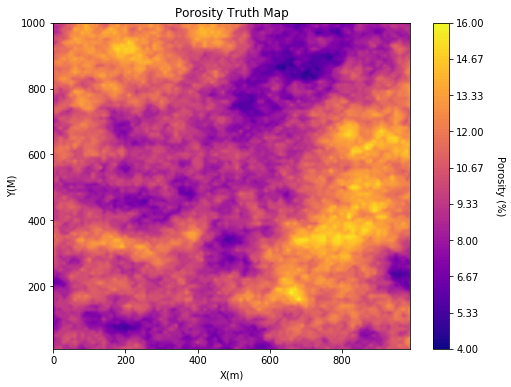

In [10]:
GSLIB.pixelplt(porosity_map,xmin,xmax,ymin,ymax,cell_size,vmin,vmax,"Porosity Truth Map","X(m)","Y(M)","Porosity (%)",cmap,"Porosity_Map")

The NumPy package *ndarray* docs recommend that users consider making their own functions to read and write *ndarray*s from ASCII files.  We have coded functions to do this using the GSLIB Geo-EAS format, to support geostatistical workflows that utilize GSLIB programs as part of the GeostatsPy package that we are developing.  We included the read and write functions here for this tutorial.   

You can look at a truncated representation of the *ndarray* like this.  Sometimes a good way to check data is to just look at it.

In [11]:
print(porosity_map)

[[ 9.47058121  9.91782937  9.9798204  ...  8.08662197  7.99914997
   7.67512324]
 [ 8.67648753  8.94498856  9.26749403 ...  9.1005366   8.91494382
   8.7221251 ]
 [ 9.1385679   8.93357916  9.87751618 ...  8.43156592  9.24581619
   8.53539139]
 ...
 [ 8.35588362  9.19257236  9.20702426 ... 10.6408045  12.38606115
  12.62603869]
 [ 8.73277387  9.1499773   9.27700186 ... 11.11619583 11.35655368
  11.88518884]
 [ 9.09635315  9.74859006 10.0117667  ... 10.76326531 10.30917151
  10.86594983]]


You can see that the 2D array is actually an array of arrays, e.g. an array of $1,\ldots,n_{y}$ of arrays of $1,\ldots,n_{x}$.  To show this we can include an index for x and we will get a slice for all values with equal $x$ index.  Let's look at the the first slice of $x$ values with $y$ index equal to zero.

In [12]:
porosity_map[0]

array([ 9.47058121,  9.91782937,  9.9798204 ,  9.91630812, 10.69861209,
       10.56588283, 11.83384658, 12.95500949, 13.26534495, 13.47717932,
       13.0367768 , 12.99151954, 12.68156439, 11.1736231 , 10.89295206,
       11.01807506, 12.17955115, 11.54442834, 11.88328728, 12.1023476 ,
       11.66726946, 11.85248192, 11.62809721, 12.89035627, 11.95250425,
       12.34726921, 11.88480853, 13.05084838, 12.11603887, 12.08903664,
       11.6189697 , 11.27364544, 12.50509913, 12.25485314, 11.2462629 ,
       10.99069252, 12.42485308, 12.21910371, 12.51270539, 12.05404784,
       11.68058041, 12.71503194, 13.15695572, 12.77702297, 13.10485283,
       12.51764946, 12.29896945, 12.79603863, 12.5769783 , 12.3906249 ,
       11.43223598, 11.66955134, 11.42881317, 10.84351136,  9.39908235,
        8.84230403,  8.07255039,  8.33534672,  8.0291947 ,  8.33762859,
        8.30758386,  6.97420627,  6.98067159,  6.71407213,  6.88445238,
        6.73917279,  7.32485491,  6.50870308,  6.08579495,  5.86

If we add another index we get a single node from the 2D array.  Let's get the first and last values from this slice with $x$ index equal to zero.  We will print them and you can confirm they are the first and last values from the output above.

In [13]:
print(porosity_map[0][0])                                        # get first and last value for iy = 0 slice
print(porosity_map[0][99])

9.470581208066502
7.675123240027007


Alternatively, you can use this notation to access a single cell in a *ndarray*.

In [14]:
print(porosity_map[0,0])                                         # get first and last value for iy = 0 slice
print(porosity_map[0,99])

9.470581208066502
7.675123240027007


You could get access to a range of values of the array like this (see below).  We get the results for *porosity_map* indices $ix = 0$ and $iy = 0,1,\ldots,9$.

In [15]:
print(porosity_map[0][0:10])                                     # get first 10 values for the iy = 0 slice

[ 9.47058121  9.91782937  9.9798204   9.91630812 10.69861209 10.56588283
 11.83384658 12.95500949 13.26534495 13.47717932]


If you want to see the entire array without truncated representation then you change the print options threshold in NumPy to a *NaN* like this.  Note, this is probably not a good idea if you are working with very large arrays.  For this example you can literally look through 10,000 values!

In [19]:
import sys
np.set_printoptions(threshold=sys.maxsize)                            # remove truncation from array visualization
print(porosity_map)

[[ 9.47058121  9.91782937  9.9798204   9.91630812 10.69861209 10.56588283
  11.83384658 12.95500949 13.26534495 13.47717932 13.0367768  12.99151954
  12.68156439 11.1736231  10.89295206 11.01807506 12.17955115 11.54442834
  11.88328728 12.1023476  11.66726946 11.85248192 11.62809721 12.89035627
  11.95250425 12.34726921 11.88480853 13.05084838 12.11603887 12.08903664
  11.6189697  11.27364544 12.50509913 12.25485314 11.2462629  10.99069252
  12.42485308 12.21910371 12.51270539 12.05404784 11.68058041 12.71503194
  13.15695572 12.77702297 13.10485283 12.51764946 12.29896945 12.79603863
  12.5769783  12.3906249  11.43223598 11.66955134 11.42881317 10.84351136
   9.39908235  8.84230403  8.07255039  8.33534672  8.0291947   8.33762859
   8.30758386  6.97420627  6.98067159  6.71407213  6.88445238  6.73917279
   7.32485491  6.50870308  6.08579495  5.86141024  6.32767406  7.39179001
   7.50474299  7.14876996  7.41308754  8.23152125  8.30910512  6.95747249
   6.71749495  6.27176804  6.27214835 

#### Summary Statistics

Let's try some summary statistics.  Here's a convenient method from SciPy. Like many of the methods it anticipates a 1D array so we do a *flatten* on the 2D array to convert it to a 1D array before passing it.   

In [20]:
stats = stats.describe(porosity_map.flatten())                   # array summary statistics
stats

DescribeResult(nobs=10000, minmax=(3.907361729887783, 15.807357455360307), mean=10.0, variance=4.000400040004, skewness=0.13942791295457974, kurtosis=-0.5302829652871464)

We also have a variety of built in summary statistic calculations that we may apply on *ndarray*s.  Note, these methods work directly with our 2D array; therefore, do not require flatening to a 1D array.

In [21]:
mean_por = porosity_map.mean()                                   # array summary statistics
stdev_por = porosity_map.std()
min_por = porosity_map.min()
max_por = porosity_map.max()
print('Summary Statistics of Porosity \n Mean = ' + str(mean_por) + ', StDev = ' + str(stdev_por))
print(' Min = ' + str(min_por) + ', Max = ' + str(max_por))

Summary Statistics of Porosity 
 Mean = 10.0, StDev = 2.0
 Min = 3.907361729887783, Max = 15.807357455360307


We can also do this with NumPy functions that work with arrays that calculate the previous summary statistics and more.  

In [22]:
mean_por = np.mean(porosity_map)                                 # array summary statistics
stdev_por = np.std(porosity_map)
min_por = np.min(porosity_map)
max_por = np.max(porosity_map)
P10_por,P90_por = np.percentile(porosity_map,[0.10,0.90])
print('Summary Statistics of Porosity \n Mean = ' + str(mean_por) + ', StDev = ' + str(stdev_por))
print(' Min = ' + str(min_por) + ', Max = ' + str(max_por))
print(' P10 = ' + str(P10_por) + ', P90 = ' + str(P90_por))

Summary Statistics of Porosity 
 Mean = 10.0, StDev = 2.0
 Min = 3.907361729887783, Max = 15.807357455360307
 P10 = 4.787387901474506, P90 = 5.715627120619864


#### Checking and Manipulating

We can read and write individual value of our array with indices $iy = 0,\ldots,ny-1$ and  $ix = 0,\ldots,nx-1$.

In [23]:
local_por = porosity_map[0,0]                                    # get porosity at location 0,0
print('Porosity at location 0,0 in our ndarray is ' + str(local_por) + '.')
porosity_map[0,0] = 10.0000                                      # change the porosity value at location 0,0
print('Porosity at location 0,0 in our ndarray is now ' + str(porosity_map[0,0]) + '.')

Porosity at location 0,0 in our ndarray is 9.470581208066502.
Porosity at location 0,0 in our ndarray is now 10.0.


We can also check for *NaN*s, invalid or missing values in our *ndarray*.  

In [24]:
porosity_map[0,0] = np.nan
print('Porosity at location 0,0 in our ndarray is now ' + str(porosity_map[0,0]) + '.')

Porosity at location 0,0 in our ndarray is now nan.


We can check for any *NaN*'s in our array with the following code.  First, let's add a couple more *NaN* values to make this example more interesting.

In [25]:
porosity_map[0,1] = np.nan                                       # add another NaN
porosity_map[2,1] = np.nan                                       # add another NaN
result = np.isnan(porosity_map).any()
result

True

Ok, so now we kown that we have *NaN*'s in our array.  This could cause issues with our calculations.  We can get a list of indices with *NaN*'s in our *ndarray*. 

In [26]:
nan_list = np.argwhere(np.isnan(porosity_map))                   # get list of indices of array with NaNs
print(nan_list)

[[0 0]
 [0 1]
 [2 1]]


We now have a list of the indices (0,0), (0,1) and (2,1) with *NaN*'s.  This is exactly the array indices that we assigned to NaN.  If you convert this list of indices by mapping them with *map* to *tuple*s and make that into a new list we get something we can use to directly interact with the *NaN*'s in our 2D *ndarray*.

In [27]:
nan_list_tuple = list(map(tuple, nan_list))                      # convert index list to tuple list 
print(nan_list_tuple)                                            # check the tuple list
print(porosity_map[nan_list_tuple[0]])                           # get the values at the indices
print(porosity_map[nan_list_tuple[1]])
print(porosity_map[nan_list_tuple[2]])

[(0, 0), (0, 1), (2, 1)]
nan
nan
nan


Now that we have this list of array coordinate, list of tuples, we can use this to actually access those locations.  Here we use those locations (there should be 3 *NaN*'s) to replace the missing values with very small porosity values (0.0001).

In [28]:
print('Value at the first NaN indices is ' + str(porosity_map[nan_list_tuple[0]]) + '.') # get value at first index
porosity_map[nan_list_tuple[0]] = 0.001                          # set the NaN's to a low porosity value
porosity_map[nan_list_tuple[1]] = 0.001
porosity_map[nan_list_tuple[2]] = 0.001
print('Value at the first NaN indices after setting to 0.001 is ' + str(porosity_map[nan_list_tuple[0]]) + '.')

Value at the first NaN indices is nan.
Value at the first NaN indices after setting to 0.001 is 0.001.


#### Making Arrays

There are various methods to make *ndarray*s from scratch.  In some cases, our arrays are small enough we can just write them like this.

In [29]:
my_array = np.array([[0,1,2],[4,5,6],[7,8,9]])                   # make an ndarray by scratch
print(my_array.shape)
my_array

(3, 3)


array([[0, 1, 2],
       [4, 5, 6],
       [7, 8, 9]])

We now have a 3 x 3 *ndarray*.

We can also use NumPy's *rand* to make an *ndarray* of any shape with random values between 0 and 1 and *zeros* to make an array of any shape with 0's. 

Shape of the random array = (100, 100)
DescribeResult(nobs=10000, minmax=(4.293647426045766e-05, 0.9997032471786877), mean=0.50466207692485, variance=0.08357688632067808, skewness=-0.025970720824312808, kurtosis=-1.2112782556305743)


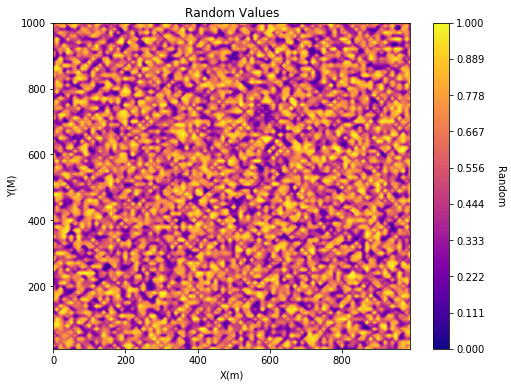

Shape of the zero array = (100, 100)
DescribeResult(nobs=10000, minmax=(0.0, 0.0), mean=0.0, variance=0.0, skewness=0.0, kurtosis=-3.0)


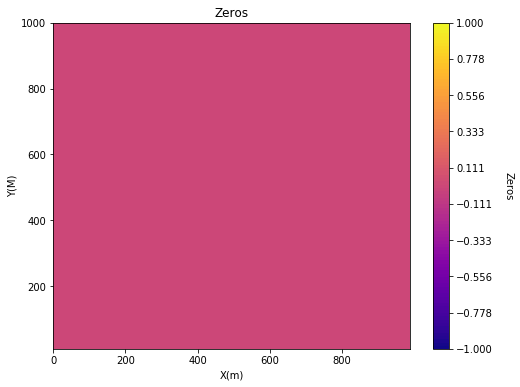

In [30]:
from scipy import stats                                          # summary stats
rand_array = np.random.rand(100,100)                             # make 100 x 100 node array with random values
print('Shape of the random array = ' + str(rand_array.shape))
print(stats.describe(rand_array.flatten()))
GSLIB.pixelplt(rand_array,xmin,xmax,ymin,ymax,cell_size,0,1,"Random Values","X(m)","Y(M)","Random",cmap,"random")

zero_array = np.zeros((100,100))                                 # make 100 x 100 node array with zeros
print('Shape of the zero array = ' + str(zero_array.shape))
print(stats.describe(zero_array.flatten()))
GSLIB.pixelplt(zero_array,xmin,xmax,ymin,ymax,cell_size,-1,1,"Zeros","X(m)","Y(M)","Zeros",cmap,"zeros")

#### Operations

We can search for values in our array with any criteria we like.  

* In this example we identify all nodes with porosity values greater than 15%, the result of *porosity > 15.0* is a boolean array (true and false) with true when that criteria is met.  

* We apply that to the *porosity_map* *ndarray* to return all node values with true in a new array.  

* We can check the size of that array to get the total number of nodes with porosity values greater than 15.   

In [31]:
greater_than = porosity_map[porosity_map > 15.0]                 # make boolean array and get values that meet criteria
print(greater_than)
print('There are ' + str(greater_than.size) + ' of a total of ' + str(porosity_map.flatten().size) + '.')

[15.06536667 15.0573801  15.5145164  15.21330845 15.02048973 15.31713392
 15.22738004 15.06004229 15.11670893 15.0022347  15.20265969 15.41297281
 15.34223458 15.12583645 15.35820773 15.19999749 15.12089238 15.20874469
 15.05319665 15.14599304 15.08400201 15.21597064 15.80735746 15.03113849
 15.78035523]
There are 25 of a total of 10000.


We can actually plot the boolean array (true = 1 and false = 0 numerically) to get a map of the nodes that meet the criteria.  We do that below with porosity > 13% because it looks more interesting than only 25 nodes for the porosity > 15% case.

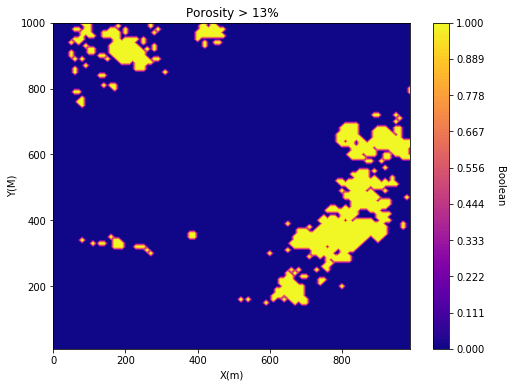

In [32]:
thresh_porosity_map = porosity_map > 13.0
GSLIB.pixelplt(thresh_porosity_map,xmin,xmax,ymin,ymax,cell_size,0,1,"Porosity > 13%","X(m)","Y(M)","Boolean",cmap,"threshold")

How would you get a list of the indices that meet the criteria in the *porosity map* array?  

* We repeat the command to make a list of tuples with locations with porosity > 15%, *loc_hig_por*.  

* Then we simply grab the ix and iy index values from this list.  The list is set up like this, my_list[0 index for iy, 1 index for ix][1 to number of nodes]

In [33]:
loc_high_por = np.nonzero(porosity_map > 15)                    # get the indices with high porosity 
print('Loc #1, ix = ' + str(loc_high_por[1][0]) + ' and iy = ' + str(loc_high_por[0][0]) + '.')
print(' With a value of ', str(porosity_map[loc_high_por[0][0],loc_high_por[1][0]]) + '.')
print('Loc #2, ix = ' + str(loc_high_por[1][1]) + ' and iy = ' + str(loc_high_por[0][1]) + '.') 
print(' With a value of ', str(porosity_map[loc_high_por[0][1],loc_high_por[1][1]]) + '.')

Loc #1, ix = 82 and iy = 34.
 With a value of  15.065366670432317.
Loc #2, ix = 88 and iy = 37.
 With a value of  15.057380096119918.


In [34]:
loc_high_por

(array([34, 37, 38, 50, 50, 57, 59, 63, 63, 63, 65, 65, 65, 65, 66, 66, 66,
        66, 66, 66, 81, 81, 82, 82, 84], dtype=int64),
 array([82, 88, 87, 83, 84, 89, 82, 83, 86, 87, 75, 79, 82, 83, 69, 70, 74,
        75, 78, 79, 66, 67, 66, 67, 68], dtype=int64))

Perhaps you want to do something more creative with your *ndarray*. The most flexible approach is to use a loop and iterate over the array.  

* Let's add noise to our porosity map.  

* To do this we take the previously calculated random array and center it (set the mean to 0.0 by subtracting the current mean), we will multiply it by a factor of 5 so that the result is more noticable and add it to the *porosity_map* array. 

**Coding Tip** Looping 

The code:

```python 
for iy in range(ny):
```

causes the computer to loop over $iy = 0, 1, \dots ,ny-1$.  By using this code we are looping over $ix$ and then $iy$ to cover the entire grid:

```python 
for iy in range(ny):
    for ix in range(nx):
```
we can then perform any manual operation on all elements of the grid!

DescribeResult(nobs=10000, minmax=(-0.17154372234808302, 17.99685624312), mean=10.020478485650106, variance=6.1204731192816295, skewness=0.05919323352510566, kurtosis=-0.3060834249348834)


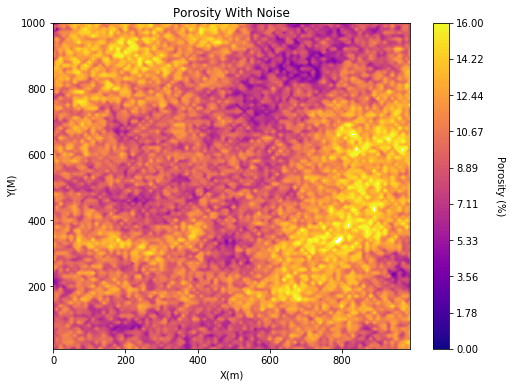

In [35]:
porosity_map_noise = np.zeros((100,100))                        # use of loops to maniputale ndarrays
for iy in range(ny):
    for ix in range(nx):
        porosity_map_noise[iy,ix] = porosity_map[iy,ix] + (rand_array[iy,ix]-0.5)*5
     
print(stats.describe(porosity_map_noise.flatten()))
GSLIB.pixelplt(porosity_map_noise,xmin,xmax,ymin,ymax,cell_size,0,16,"Porosity With Noise","X(m)","Y(M)","Porosity (%)",cmap,"Residual")

We could have done the above without the loops, by using the simple statement below.  

* We can use algebriac operators on *ndarray*s like this example below if the *ndarray* are all the same size. 

* This is known as the braodcast method.  It is computationally much more efficient.

Here's the same operation as above with loops, now with the broadcast method:

```python
porosity_map_noise = porosity_map + (rand_array-0.5) * 5
```

DescribeResult(nobs=10000, minmax=(-0.17154372234808302, 17.99685624312), mean=10.020478485650106, variance=6.1204731192816295, skewness=0.05919323352510566, kurtosis=-0.3060834249348834)


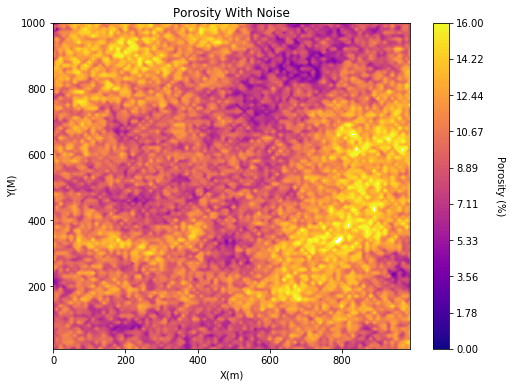

In [36]:
porosity_map_noise2 = porosity_map + (rand_array-0.5) * 5        # using matrix algebra to repeat the previous looped method
print(stats.describe(porosity_map_noise.flatten()))
GSLIB.pixelplt(porosity_map_noise2,xmin,xmax,ymin,ymax,cell_size,0,16,"Porosity With Noise","X(m)","Y(M)","Porosity (%)",cmap,"Residual2")

Let's write our new *ndarray* to a file for storage and to apply with other software such as GSLIB.

* We could also have written it out as a comma delimited file, with this command.

```python
np.savetxt("porosity_noise_GSLIB.csv", porosity_map_noise, delimiter=",")
```

In [37]:
GSLIB.ndarray2GSLIB(porosity_map_noise,"porosity_noise_GSLIB.dat","porosity_noise")   # write out 2D array to a Geo-DAS ASCII file

#### More Exercises

There are so many more exercises and tests that one could attempt to gain experience with the pandas (DataFrames) for tabular data and numpy (ndarrays) for gridded data packages in Python. 

Check out the docs: 

* [pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

* [numpy](https://docs.scipy.org/doc/numpy/reference/)

I'm always happy to discuss,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin